# EDA para Titanic
* Parte 1: Análisis exploratorio de datos  (EDA):
     * 1) Análisis de las características.

     * 2) Encontrar cualquier relación o tendencia considerando múltiples características.
    

* Parte2: Ingeniería de características y limpieza de datos:
     * 1) Agregar algunas características.

     * 2) Eliminación de funciones redundantes.

     * 3) Convertir características en forma adecuada para modelar.
Análisis de datos exploratorios Titanic

In [ ]:
import numpy as np  #manejo de vectores y arreglos
import pandas as pd #manejo del data frame
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline #permite gráficos en en una misma fila

In [2]:
data = pd.read_csv('train_titanic.csv')

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
#revisar el total de valores nulos
data.isnull().sum()

#Age, Cabin y Embarked tienen valores nulos. Intentaré arreglarlos

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

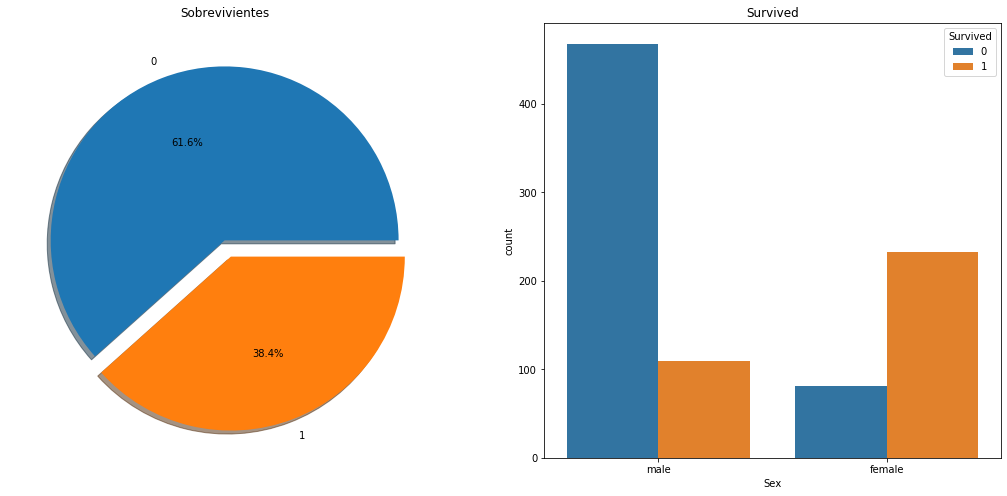

In [15]:
#cuántos sobrevivieron?

f,ax=plt.subplots(1,2,figsize=(18,8))  #subplots(1 fila, 2 columnas, tamaño) -> grafica en 1 filas 2 gráficos

#generamos un gráfico circular con la función 
#    plot.pie(separación entre colores-opcional, 
             #formato % , 
             #ax = ax[columna] -> al inicio definimos 1 fila con 2 columnas  
             #shadow = sombra

data['Survived'].value_counts().plot.pie(explode=[0,0.1] ,autopct='%1.1f%%',ax=ax[0], shadow = True)

ax[0].set_title('Sobrevivientes')  #titulo para el gráfico de la columna 0
ax[0].set_ylabel('')               #etiqueta en eje y para el  gráfico de la columna 0

#gráfico de barra
sns.countplot('Sex', hue = 'Survived', data=data,ax=ax[1]) 
ax[1].set_title('Survived')
plt.show()

In [16]:
#interpretemos la información
data['PassengerId'].count()

891

In [23]:
#revisamos el campo "sobrevivientes" contando la cantidad de registros individualmente
data['Survived'].value_counts()
print("sobrevivientes :" , data[ data['Survived'] == 1 ]['Survived'].count())

sobrevivientes : 342


Interpretación hasta el momento
------------------------------------------------------------------------------------------------------
De 891 pasajeros en el conjunto de entrenamiento, solo alrededor de 350 sobrevivieron, es decir, 
solo el 38.4% del conjunto total de entrenamiento sobrevivió al accidente. 


# Análisis de Características

Caracteristicas categóricas

Una variable categórica es aquella que tiene dos o más categorías y cada valor en esa característica puede clasificarse por ellas. Por ejemplo, el género es una variable categórica que tiene dos categorías (masculina y femenina). No podemos dar ningún orden a tales variables. También se conocen como variables nominales.

* **Categorical Features in the dataset: Sex**

Características ordinales

Una variable ordinal es similar a los valores categóricos, pero la diferencia entre ellos es que podemos tener una ordenación u ordenación relativa entre los valores. Por ejemplo: si tenemos una característica como Altura con valores Alto, Medio, Corto, entonces Altura es una variable ordinal. Aquí podemos tener una ordenación relativa en la variable.

* **Ordinal Features in the dataset: PClass**

Características continua:

Se dice que una característica es continua si puede tomar valores entre dos puntos o entre los valores mínimos o máximos en la columna de características.

* **Continous Features in the dataset: Age**

# Análisis de Características

### analizando variable sexo categórica

In [8]:
#interpretemos la información
data['PassengerId'].count()

data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

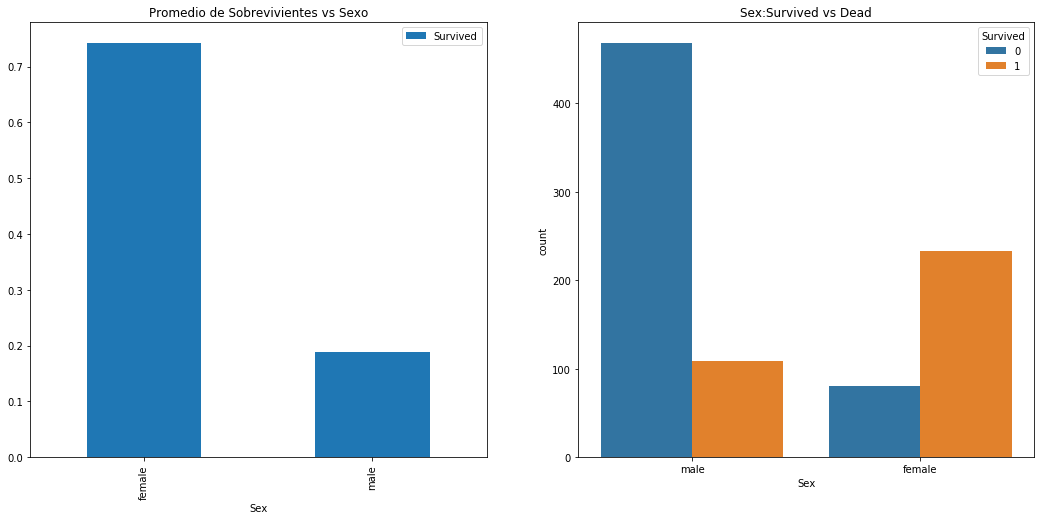

In [9]:
#generamos 1 fila y 2 columnas para gráficos
f,ax=plt.subplots(1,2,figsize=(18,8))

data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Promedio de Sobrevivientes vs Sexo')

sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [10]:
#Esto se ve interesante. El número de hombres en el barco es mucho más que el número de mujeres. Aún así, 
#el número de mujeres salvadas es casi el doble del número de hombres salvados. 
#Las tasas de supervivencia para una mujer en el barco es de alrededor del 75%,
#mientras que para los hombres en alrededor del 18-19%.
#comprobar resultados aproximados
#570   100%
#100   X
print("porcentaje de hombres que sobreviven: " , (100 * 100) / 570)

porcentaje de hombres que sobreviven:  17.54385964912281


### Analizando variable ordinal PClass 

In [11]:
#comparamos el campo PClass con la supervivencia

# margins= True muestra la suma de los resultados por filas y columnas
# style.background_gradient(cmap='summer_r') agrupa por color

pd.crosstab(data['Pclass'],data['Survived'],margins=True).style.background_gradient(cmap='summer_r')


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [12]:
#comprobamos el el total corresponde a la cantidad de personas por clase
print("total de personas : ", data['Pclass'].count())

total de personas :  891


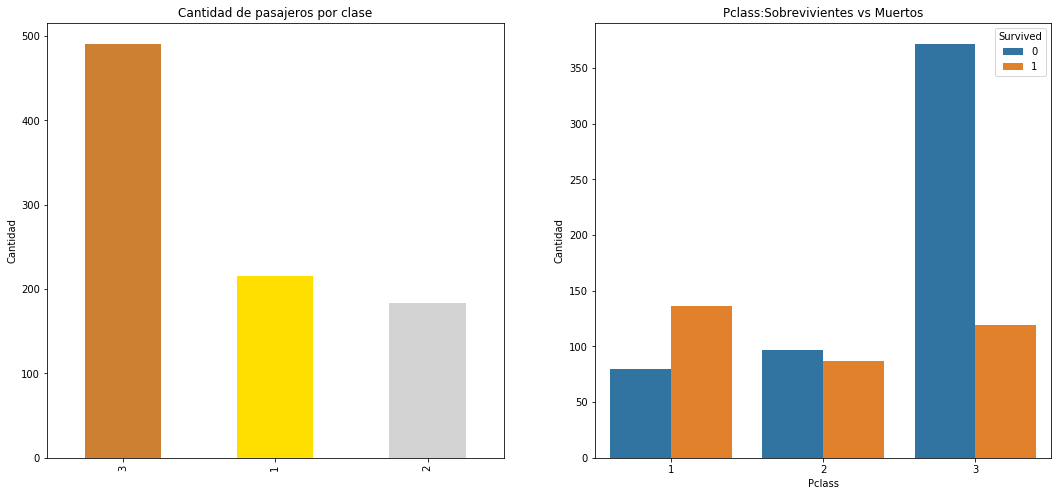

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Cantidad de pasajeros por clase')
ax[0].set_ylabel('Cantidad')

sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Sobrevivientes vs Muertos')
ax[1].set_ylabel('Cantidad')
plt.show()

La gente dice que el dinero no puede comprarlo todo. Pero podemos ver claramente que Passenegers Of Pclass 1 recibió una prioridad muy alta durante el rescate. A pesar de que la cantidad de Pasajeros en la Clase 3 fue mucho mayor, la supervivencia de ellos es muy baja, alrededor del 25%.

Para Pclass, el 1% sobrevivido es de alrededor del 63%, mientras que para Pclass2 es de alrededor del 48%. Entonces el dinero y el estado son importantes. Un mundo tan materialista.

Vamos a sumergirnos un poco más y buscar otras observaciones interesantes. Vamos a comprobar la tasa de supervivencia con Sex and Pclass 

### Analizar la tasa de supervivencia según sexo y clase

In [14]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

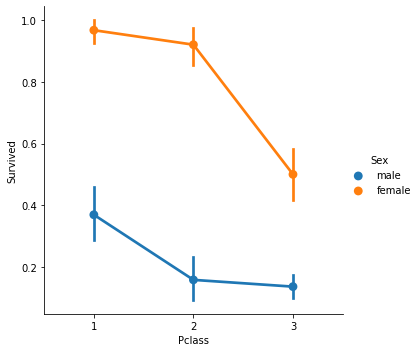

In [15]:
#Usamos FactorPlot en este caso, porque facilitan la separación de valores categóricos.
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

#Mirando el CrossTab y el FactorPlot, podemos inferir fácilmente que la supervivencia de las 
#mujeres de primera clase es de aproximadamente 95-96%, ya que solo 3 de 94 mujeres de esa clase murieron.

#Es evidente que, independientemente de la clase, las mujeres recibieron la primera prioridad durante el rescate.
#Incluso los hombres de primera clase tienen una tasa de supervivencia muy baja

### Analizando  el pasaje (característica continua)

In [16]:
print('El pasaje más alto fue :',data['Fare'].max())
print('El pasaje más bajo fue :',data['Fare'].min())
print('El pasaje promedio fue :',data['Fare'].mean())

#El pasaje más bajo es 0.0. ¡¡Guau!! un paseo lujoso gratis

El pasaje más alto fue : 512.3292
El pasaje más bajo fue : 0.0
El pasaje promedio fue : 32.2042079685746


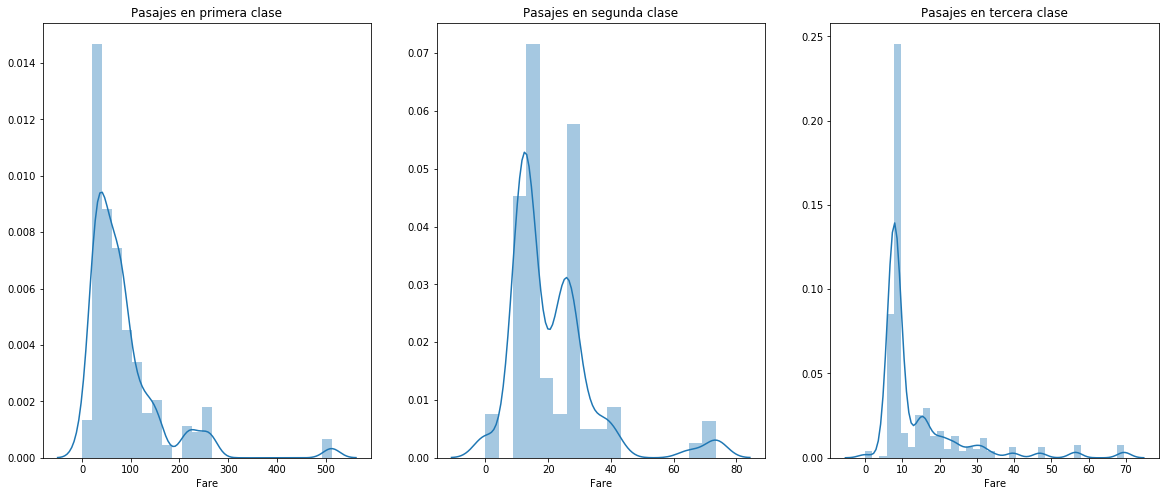

In [17]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])

ax[0].set_title('Pasajes en primera clase')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])

ax[1].set_title('Pasajes en segunda clase')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])

ax[2].set_title('Pasajes en tercera clase')
plt.show()

#Parece que hay una gran distribución en los Pasajes de Pasajeros en primera clase y esta distribución 
#continúa disminuyendo a medida que se reducen los estándares. Como esto también es continuo, 
#podemos convertir en valores discretos usando binning.


##### EN RESUMEN A NIVEL GENERAL DE LO ENCONTRADO

Sexo: la posibilidad de supervivencia para las mujeres es alta en comparación con los hombres.

Pclass: hay una tendencia visible de que ser un pasajero de primera clase le brinda mejores posibilidades de supervivencia. La tasa de supervivencia para Pclass3 es muy baja. Para las mujeres, la probabilidad de supervivencia de Pclass1 es casi 1 y también es alta para las de Pclass2. ¡El dinero gana!

### Limpieza de datos

* Convertir algunas variables continuas en rangos.
* Convertir valores String en valores numéricos.
* Eliminar características innecesarias 
* Corregir valores nulos.




No es necesario que todas las características sean importantes. Puede haber muchas características redundantes que deberían eliminarse.

* **Problema con la característica de edad:**

Como mencioné anteriormente, la edad es una característica continua, existe un problema con las variables continuas en los modelos de aprendizaje automático.

Por ejemplo: si digo agrupar u organizar a un deportista por sexo, podemos segregarlo fácilmente por hombre y mujer.

Ahora, si digo agruparlos por edad, ¿cómo lo harías? Si hay 30 personas, puede haber 30 valores de edad. Ahora esto es problemático.

Necesitamos convertir estos valores continuos en valores categóricos mediante Binning o Normalization. Usaré binning, es decir, agrupar un rango de edades en un único bin o asignarles un solo valor.

De acuerdo, la edad máxima de un pasajero era de 80 años. Así que dividamos el rango de 0 a 80 en 5 compartimientos. Entonces 80/5 = 16. Entonces contenedores de tamaño 16.


In [18]:
#creamos una nueva columna en el DataFrame llamada 
data['Rango_de_edad']=0
data.loc[data['Age']<=16,'Rango_de_edad']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Rango_de_edad']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Rango_de_edad']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Rango_de_edad']=3
data.loc[data['Age']>64,'Rango_de_edad']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Rango_de_edad
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2


In [19]:
#comprobar el número de pasajeros en cada banda
data['Rango_de_edad'].value_counts().to_frame().style.background_gradient(cmap='summer')



,Rango_de_edad
1,346
0,277
2,188
3,69
4,11


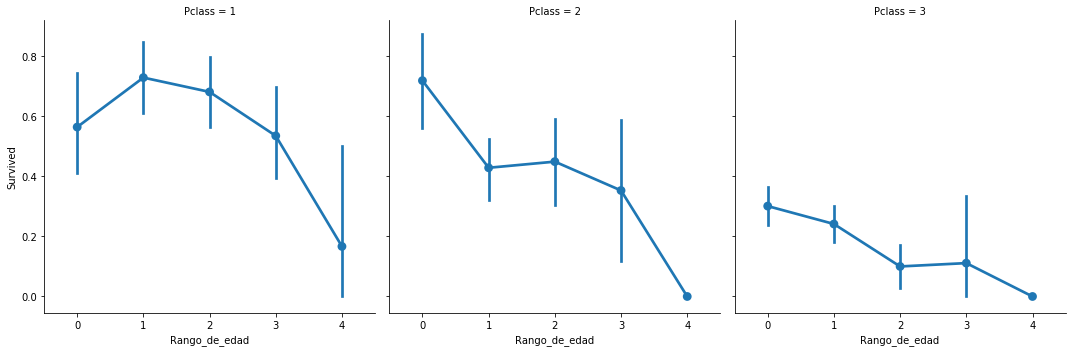

In [20]:
#podemos observar que la tasa de supervivencia disminuye a medida que aumenta la edad, independientemente de la clase
sns.factorplot('Rango_de_edad','Survived',data=data,col='Pclass')
plt.show()

* **Problemas con la característica del pasaje**

Como el pasaje también es una característica continua, debemos convertirla en un valor ordinal. 
Para esto usaremos pandas.qcut.

Entonces, lo que qcut hace es dividir u organizar los valores de acuerdo con el número de bins que hemos pasado. Entonces, si pasamos por 5 bins, organizará los valores igualmente espaciados en 5 bins separados o rangos de valores.

In [21]:
data['Rango_pasaje']=pd.qcut(data['Fare'], 4) #creamos 4 rangod para categorizar el precio del pasaje 

#agrupamos la columna, y obtenemos el promedio del precio del pasasje en relación a la variable objetivo
data.groupby(['Rango_pasaje'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Rango_pasaje,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


Como se discutió anteriormente, podemos ver claramente que a medida que aumenta el rango de tarifa, aumentan las posibilidades de supervivencia.

Ahora no podemos pasar los valores Fare_Range tal como están. Deberíamos convertirlo en valores simples como lo hicimos en Rango de edad

In [7]:
data['Categoria_pasaje']=0
data.loc[data['Fare']<=7.91,'Categoria_pasaje']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Categoria_pasaje']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Categoria_pasaje']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Categoria_pasaje']=3

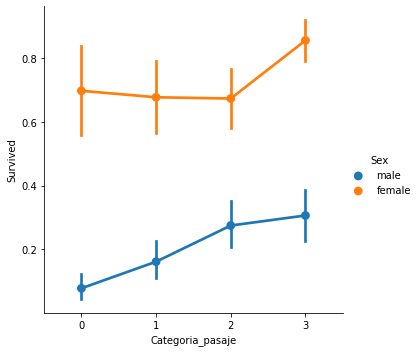

In [8]:
#generamos un grafico de factor
sns.factorplot('Categoria_pasaje','Survived',data=data,hue='Sex')
plt.show()

#a medida que aumenta Fare_cat, aumentan las posibilidades de supervivencia. 
#Esta característica puede convertirse en una característica importante durante el modelado junto con el sexo.

### Limpieza de datos : Convertir valores String en valores numéricos

Dado que no podemos pasar cadenas a un modelo de aprendizaje automático, necesitamos convertir las características loke Sex, Embarked, etc. en valores numéricos.

In [24]:
#revisamos los datos 
data.head(3)

#sexo y puerta de embarque son variables de tipos string

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Rango_de_edad,Rango_pasaje,Categoria_pasaje
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(7.91, 14.454]",1


In [25]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

In [26]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Rango_de_edad,Rango_pasaje,Categoria_pasaje
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,2,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1,"(7.91, 14.454]",1


### Eliminar características innecesarias

* PassengerId -> No se puede clasificar.
* Nombre      -> No necesitamos el nombre, ya que no se puede convertir en ningún valor categórico.
* Edad        -> Tenemos la columna Rango de edad, por lo que no es necesario.
* Ticket      -> Es una cadena aleatoria que no se puede clasificar.
* Pasaje      -> Tenemos la función Categoria_pasaje, por lo que no es necesario
* Cabina      -> Muchos valores de NaN y también muchos pasajeros tienen varias cabinas. Esta es una característica inútil.
* Rango_pasaje-> Tenemos la columna Categoria_pasaje .


In [27]:
data.drop(['PassengerId','Name','Age','Ticket','Fare','Cabin','Rango_pasaje',],axis=1,inplace=True)

In [28]:
#revisamos nuestros datos finales
data.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Rango_de_edad,Categoria_pasaje
0,0,3,0,1,0,0.0,1,0
1,1,1,1,1,0,1.0,2,3
2,1,3,1,0,0,0.0,1,1


In [29]:
data.corr()['Survived'].sort_values(ascending=False)

Survived            1.000000
Sex                 0.543351
Categoria_pasaje    0.295875
Embarked            0.108669
Parch               0.081629
Rango_de_edad       0.001254
SibSp              -0.035322
Pclass             -0.338481
Name: Survived, dtype: float64

## Tratamiento de datos nulos

* podemos eliminarlos
* podemos dejarlos como están
* podemos deducirlos

In [30]:
#revisamos si hay datos nulos
data.isnull().sum()


Survived            0
Pclass              0
Sex                 0
SibSp               0
Parch               0
Embarked            2
Rango_de_edad       0
Categoria_pasaje    0
dtype: int64

In [31]:
#revisamos en donde están estos valores
data[data['Embarked'].isnull() ] 

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Rango_de_edad,Categoria_pasaje
61,1,1,1,0,0,NaN,2,3
829,1,1,1,0,0,NaN,3,3


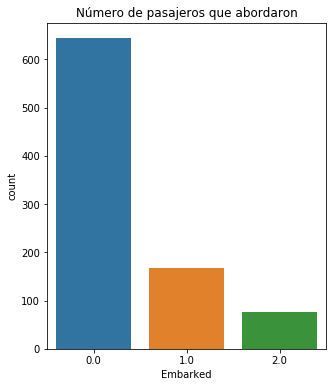

In [32]:
#ya que son solo 2, podríamos predecir la puerta de embarque en relación a la mayor cantidad de personas por puerta 

f,ax=plt.subplots(1,1,figsize=(5,6))

sns.countplot('Embarked',data=data,ax=ax)
ax.set_title('Número de pasajeros que abordaron')
plt.show()


In [33]:
#llenamos los campos nulos con la categoría con mayor cantidad de registros
#en este caso el mayor numero de pasajeros abordaron por la puerta de embarque cero 

data['Embarked'].fillna(0,inplace=True)

In [34]:
#revisamos nuevamente si hay datos nulos
data.isnull().sum()

Survived            0
Pclass              0
Sex                 0
SibSp               0
Parch               0
Embarked            0
Rango_de_edad       0
Categoria_pasaje    0
dtype: int64

In [62]:
#exportamos nuestro archivo a csv
data.to_csv("cleaning_titanic.csv")

In [63]:
#exportamos nuestro archivo a csv
data.to_excel("cleaning_titanic.xlsx")